# Ordinary differential equations

Ordinary differential equations (ODEs) are equations involving an unknown function and its derivatives, describing how the function changes with respect to one independent variable. A first order ODE has the general form
$$
\frac{dy}{dx} = f(x, y),
$$
where $y(x)$ is the unknown function and $f(x, y)$ specifies the rate of change. Such equations arise in modeling physical, biological, and engineering systems, where the future state depends on the current state and its rate of change. Solving a first order ODE typically requires an initial condition, $y(x_0) = y_0$, to determine a unique solution. Analytical solutions are possible for some equations, but many require numerical methods for practical computation.

A well-posed problem for ordinary differential equations (ODEs) is one that satisfies the following criteria:

1. **Existence:** There is at least one solution to the ODE for the given initial or boundary conditions.
2. **Uniqueness:** The solution is unique; no other solution satisfies the same conditions.
3. **Continuous Dependence:** The solution depends continuously on the initial or boundary data—small changes in the data lead to small changes in the solution.

For initial value problems (IVPs), a typical well-posed ODE is:
$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$
where $f(x, y)$ is continuous and satisfies a Lipschitz condition in $y$ near $(x_0, y_0)$, ensuring existence and uniqueness by the Picard-Lindelöf theorem.

The **Lipschitz condition** for the function $f(x, y)$ is:

A function $f(x, y)$ satisfies a Lipschitz condition in $y$ on a region $D$ if there exists a constant $L > 0$ such that for all $(x, y_1)$ and $(x, y_2)$ in $D$,
$$
|f(x, y_1) - f(x, y_2)| \leq L |y_1 - y_2|.
$$

This condition ensures that the function does not change too rapidly with respect to $y$, which is crucial for guaranteeing the uniqueness of solutions to the ODE. 

A useful assurance is that if the function $f(x, y)$ is continuously differentiable with respect to $y$ on a region $D$, then it automatically satisfies a Lipschitz condition on any closed and bounded subset of $D$. This is because the existence of a continuous partial derivative $\frac{\partial f}{\partial y}$ implies that the difference $|f(x, y_1) - f(x, y_2)|$ can be bounded by $L |y_1 - y_2|$, where $L$ is the maximum value of $|\frac{\partial f}{\partial y}|$ on the subset. Thus, continuous differentiability in $y$ is a sufficient condition for uniqueness of solutions to the ODE.

We're going to use the example being used in Turner
$$
 \frac{d }{dx} y(x) = (6x^2 − 1) y, \ y(0)=1
$$ 
with the analytical solution. 
$$
 y(x)=e^{2x^3-x}
$$



Here is phase diagram of that problem. 

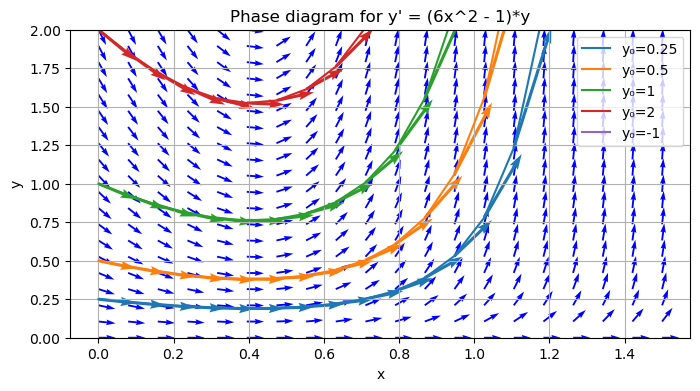

In [3]:
import numpy as np

import matplotlib.pyplot as plt

# Definerer x- og y-verdier
x = np.linspace(0, 1.5, 20)
y = np.linspace(0, 2, 20)
X, Y = np.meshgrid(x, y)
# Plotter noen løsninger for y' = (6x^2 - 1)*y

# Definerer differensiallikningen y' = (6x^2 - 1)*y
dY = (6 * X**2 - 1) * Y
dX = np.ones_like(dY)  # dx/dt = 1 for fasediagram
norm = np.sqrt(dX**2 + dY**2)
dX_normalized = dX / norm
dY_normalized = dY / norm
# Plotter fasediagrammet
plt.figure(figsize=(8, 4))
plt.quiver(X, Y, dX_normalized, dY_normalized, color='blue')
plt.xlabel('x')
plt.ylabel('y')
for y0 in [0.25, 0.5, 1, 2, -1]:
    y_sol = y0 * np.exp(2 * x**3 - x)
    line, = plt.plot(x, y_sol, label=f'y₀={y0}')
    color = line.get_color()
    # Plot tangent vectors along the solution curve
    for i in range(len(x)):
        loc_dY = (6 * x[i]**2 - 1) * y_sol[i]
        loc_dX = np.ones_like(loc_dY)  # dx/dt = 1 for fasediagram
        norm = 1#np.sqrt(loc_dX**2 + loc_dY**2)
        loc_dX_normalized = loc_dX / norm
        loc_dY_normalized = loc_dY / norm
        plt.quiver(x[i], y_sol[i], loc_dX_normalized, loc_dY_normalized, 
                   color=color, angles='xy', scale_units='xy', scale=10, width=0.005)
plt.legend()
plt.ylim(0, 2)
plt.title("Phase diagram for y' = (6x^2 - 1)*y")
plt.grid(True)
plt.show()

## Euler method
The Euler method is the simplest numerical technique for solving ordinary differential equations (ODEs) with initial conditions. It approximates the solution by stepping forward in small increments, using the derivative at the current point to estimate the next value. For a first-order ODE of the form
$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0,
$$
the Euler method updates the solution as
$$
y_{k+1} = y_k + h\, f(x_k, y_k),
$$
where $h$ is the step size. This formula is derived from the first-order Taylor expansion of $y(x)$ about $x_k$:
$$
y(x_{k+1}) \approx y(x_k) + h\, y'(x_k)+ O(h^2) = y_k + h\, f(x_k, y_k)+O(h^2).
$$
A **stiff problem** in the context of ODEs refers to a situation where the solution contains rapidly decaying components alongside slowly varying ones. This causes standard explicit methods like Euler's to require extremely small step sizes for stability, making them inefficient or impractical. Stiffness typically arises when the ODE has terms with very different time scales, such as in chemical kinetics or electrical circuits. For stiff problems, implicit methods (e.g., backward Euler or specialized stiff solvers) are preferred, as they allow for larger step sizes while maintaining stability.

**Euler's method** serves as a foundation for more advanced techniques, such as Runge-Kutta methods, which use higher-order terms from the Taylor expansion for improved accuracy.

In [4]:
import numpy as np 

def euler(fcn, a, b, y0, N): # Euler's method for solving y' = f(x,y), y(a)=y0
    ''' Euler's method for solving ODEs:
    Advances the solution y' = f(x, y) from x=a to x=b in N steps,
    starting from initial value y(a) = y0. '''
    h = (b - a) / N # Step size
    x = a + np.arange(N + 1) * h # x values
    y = np.zeros(x.size) # Initialize y values
    y[0] = y0 # Initial condition
    for k in range(N): # Euler's method loop
        y[k + 1] = y[k] + h * fcn(x[k], y[k]) # Update y value
    return (x, y)


In [5]:
help(euler) # Display the docstring for the euler function

Help on function euler in module __main__:

euler(fcn, a, b, y0, N)
    Euler's method for solving ODEs:
    Advances the solution y' = f(x, y) from x=a to x=b in N steps,
    starting from initial value y(a) = y0.



### The example
Here we define the rhs and the analytical solution 
$$
 \frac{d }{dx} y(x) = (6x^2 − 1) y, \ y(0)=1
$$
and with the analytical solution. 
$$
 y(x)=e^{2x^3-x}
$$




In [6]:
import ipywidgets as widgets
from IPython.display import display

def rhs_fcn(x, y):
    return (6 * x**2 - 1) * y

def exact(x):
    return np.exp(2 * x**3 - x)

N=8
b=1.
x_dense = np.linspace(0, b, 100)
def plot_euler_error(N):
    b = 1.
    x, y = euler(rhs_fcn, 0, b, 1, N)
    plt.figure(figsize=(8, 4))
    plt.plot(x, y, 'o-', label=f'Euler method (N={N})')
    plt.plot(x_dense, exact(x_dense), 'r-', label='Exact solution')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Euler's Method vs Exact Solution")
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.plot(x, y - exact(x), 'o-', label=f'Euler method (N={N})')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("error in Euler's Method")
    plt.legend()
    plt.grid(True)
    plt.show()

slider = widgets.IntSlider(value=4, min=2, max=128, step=2, description='N')
widgets.interact(plot_euler_error, N=slider)
plt.show()

interactive(children=(IntSlider(value=4, description='N', max=128, min=2, step=2), Output()), _dom_classes=('w…

Demonstrating the $O(h)$ error. 

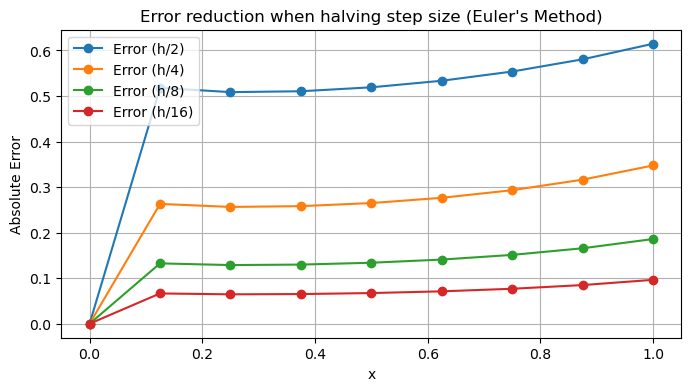

In [7]:
N = 8
b = 1.0

# Euler with step h
x, y = euler(rhs_fcn, 0, b, 1, N)
error_h = y - exact(x)

plt.figure(figsize=(8, 4))
# Euler with step h/2
for factor in np.arange(1, 5):
    N_factor = 2**(factor) * N
    x_factor, y_factor = euler(rhs_fcn, 0, b, 1, N_factor)
    error_factor = y_factor[::2**(factor)] - exact(x)
    plt.plot(x, np.abs(error_factor)/(np.abs(error_h)+1e-16), 'o-', label=f'Error (h/{2**(factor)})')

plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.title("Error reduction when halving step size (Euler's Method)")
plt.legend()
plt.grid(True)
plt.show()

## Higher order Taylor 
Using the example. 
Higher order Taylor methods use additional terms from the Taylor expansion to achieve greater accuracy when integrating ordinary differential equations (ODEs). For an initial value problem
$$
y' = f(x, y), \quad y(x_0) = y_0,
$$
the Taylor method of order $n$ approximates $y(x+h)$ by expanding $y(x)$ in a Taylor series up to the $n$th derivative:
$$
y(x+h) \approx y(x) + h y'(x) + \frac{h^2}{2} y''(x) + \cdots + \frac{h^n}{n!} y^{(n)}(x).
$$
Each derivative $y^{(k)}(x)$ is computed recursively using the chain rule and the original ODE. For example, the second derivative is
$$
y''(x) = \frac{d}{dx} f(x, y(x)) = f_x(x, y) + f_y(x, y) y'(x)=f_x(x, y) + f_y(x, y) f(x,y),
$$
where $f_x$ and $f_y$ are partial derivatives of $f$ with respect to $x$ and $y$, respectively.

Higher order Taylor methods require symbolic or automatic differentiation to compute these derivatives, but they provide improved accuracy compared to Euler's method, especially for stiff or rapidly changing solutions.

Let's now solve the example ODE
$$
y' = (6x^2 - 1) y, \quad y(0) = 1
$$
using a higher order Taylor method.

We can extend the Taylor method to third order by including the third derivative term:
$$
y_{k+1} = y_k + h f(x_k, y_k) + \frac{h^2}{2} y''(x_k, y_k) + \frac{h^3}{6} y'''(x_k, y_k)
$$
where $y''(x_k, y_k)$ and $y'''(x_k, y_k)$ are the second and third derivatives of $y$ evaluated at $(x_k, y_k)$.

For our example, the higher order derivatives are
$$
y'' =\frac{d}{dx} y'(x)= \frac{d}{dx}[(6x^2-1)y] = 12x y + (6x^2-1) y' \\[5mm]
y'''= \frac{d}{dx}[12x y + (6x^2-1) y']= 12 y +24 x y'+ (6x^2-y)y''
$$

Including higher order terms further improves accuracy, especially for stiff or rapidly varying solutions. The trade-off is increased computational effort to evaluate higher derivatives. In practice, symbolic or automatic differentiation tools are often used to generate these terms for complex ODEs.

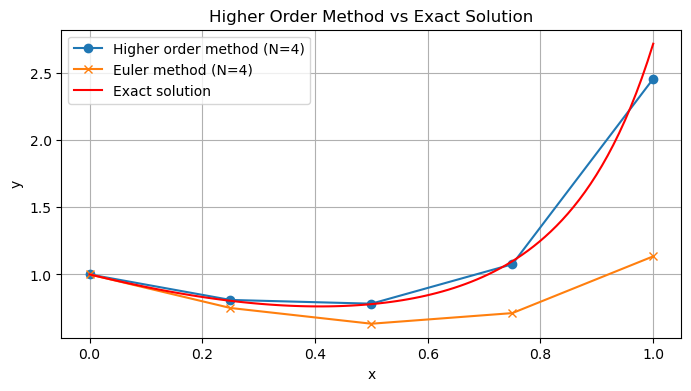

In [8]:
def fcn(x, y):
    return (6 * x**2 - 1) * y

N=4
b=1.0
x_dense = np.linspace(0, b, 100)
h = (b - 0) / N
x = 0 + np.arange(N + 1) * h
y = np.zeros(x.size)

x,y_euler = euler(fcn, 0, b, 1, N)
y[0] = 1
for k in range(N):
        y1 = fcn(x[k], y[k])
        y2 = (12*x[k]*y[k] + (6*x[k]**2 - 1)*y1)
        y3= (12*y[k] + 24*x[k]*y1 + (6*x[k]**2 - 1)*y2)
        y[k + 1] = y[k] + h * y1 + (h**2)/2 * y2 + (h**3)/6 * y3

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o-', label=f'Higher order method (N={N})')
plt.plot(x, y_euler, 'x-', label=f'Euler method (N={N})')
plt.plot(x_dense, exact(x_dense), 'r-', label='Exact solution')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Higher Order Method vs Exact Solution")
plt.legend()
plt.grid(True)
plt.show()

**Task:** Can find the next term, $O(h^4)$ in the expansion and see how the solution improves even further. 

### Limitations of Higher Order Taylor Methods

While higher order Taylor methods can achieve greater accuracy for solving ordinary differential equations by including more terms from the Taylor expansion, they have several important limitations:

- **Complexity of Derivatives:** Computing higher derivatives of the solution often requires symbolic differentiation or automatic differentiation tools. For nonlinear or complicated ODEs, these derivatives can become extremely complex and difficult to obtain.

- **Computational Cost:** Evaluating higher order derivatives at each step increases the computational workload, making the method less efficient compared to alternatives like Runge-Kutta methods, which achieve high accuracy without explicit higher derivatives.

- **Stability Issues:** Taylor methods may suffer from numerical instability, especially for stiff equations, unless very small step sizes are used.

- **Limited Applicability:** For many practical problems, especially systems of ODEs or equations with non-smooth right-hand sides, Taylor methods are not feasible due to the difficulty of calculating and managing higher derivatives.

- **Implementation Difficulty:** Coding higher order Taylor methods is more challenging and error-prone, particularly for general-purpose solvers, compared to widely used methods like RK4.

Because of these limitations, higher order Taylor methods are rarely used in practice for general ODE solving, and are mostly of theoretical interest or applied to problems where derivatives are easily available.

# Runge-Kutta methods
## Second order RK.
The second-order Runge-Kutta method (often called the midpoint method or RK2) is a numerical technique for solving ordinary differential equations with improved accuracy over Euler's method. RK2 uses two evaluations of the derivative per step: one at the beginning of the interval and one at the midpoint, using the first evaluation to estimate the midpoint value. The update formula for advancing the solution from $ x_k $ to $ x_{k+1} = x_k + h $ is:

$$
\begin{align*}
k_1 &= f(x_k, y_k) \\
k_2 &= f(x_k + \alpha h, y_k + \alpha h k_1) \\
y_{k+1} &= y_k + h[ (1-\frac{1}{2\alpha})k_1 + \frac{1}{2\alpha}k_2]
\end{align*}
$$

- $\alpha = 1$ gives the midpoint method,
- $\alpha = 1/2$ gives the trapezoidal method.
- $\alpha = 2/3$ gives Heun's method.

This approach provides a better approximation than Euler's method by averaging the slopes at the start and at another point in  of the interval, given by the $\alpha$ parameter, resulting in a local error of order $ O(h^3) $ and a global error of order $ O(h^2) $. The RK2 method is a simple yet effective way to improve accuracy for many initial value problems. Not often used though. 

In [9]:
def rk2(fcn, a, b, y0, N, alpha=1): # Second-order Runge-Kutta method
    """ Solve the ODE y' = fcn(x, y) with initial condition y(a) = y0
        on the interval [a, b] using N steps and parameter alpha (0 < alpha <= 1).
        Returns arrays of x and y values.
        alpha = 1 gives the midpoint method,
        alpha = 0.5 gives the trapezoidal method.
        alpha = 2/3 gives Heun's method.

    """
    h = (b - a) / N # Step size
    x = a + np.arange(N + 1) * h # x values
    y = np.zeros(x.size) # y values
    y[0] = y0 # Initial condition
    for k in range(N): # Main loop
        k1 = fcn(x[k], y[k]) # Slope at the beginning of the interval
        k2 = fcn(x[k] + alpha*h, y[k] + alpha*h*k1) # Slope at the end of the interval
        y[k + 1] = y[k] + h  * ((1-1/(2*alpha))*k1 + (1/(2*alpha))*k2) # Update y value
    return x, y



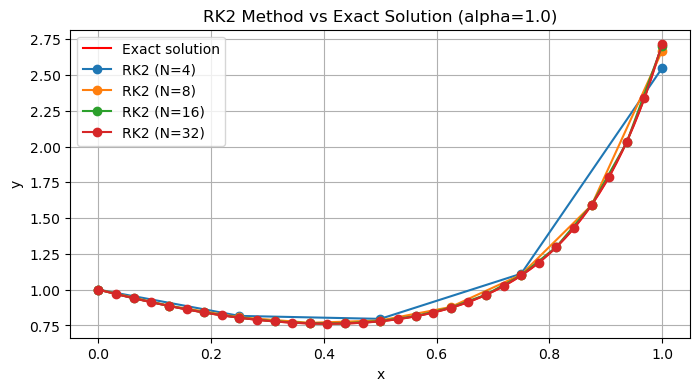

In [10]:
# Demonstrate how the error improves with increasing N for RK2

N_values = [4, 8, 16, 32]
errors_rk2 = []
b = 1.0
alpha=1.0

plt.figure(figsize=(8, 4))
plt.plot(x_dense, exact(x_dense), 'r-', label='Exact solution')

for N in N_values:
    x_rk2, y_rk2 = rk2(rhs_fcn, 0, b, 1, N)
    plt.plot(x_rk2, y_rk2, 'o-', label=f'RK2 (N={N})')
    err = np.max(np.abs(y_rk2 - exact(x_rk2)))
    errors_rk2.append(err)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f"RK2 Method vs Exact Solution (alpha={alpha})")
plt.grid(True, which='both')
plt.legend()
plt.show()

### Local and globale order of the RK2 scheme. 
The local and global orders of RK2 (second-order Runge-Kutta) can be demonstrated numerically by analyzing how the error decreases as the step size $h$ is reduced.

- **Local error**: For RK2, the local truncation error per step is $O(h^3)$.
- **Global error**: The accumulated global error over the interval is $O(h^2)$.

To demonstrate this:

1. **Compute the numerical solution for several values of $N$ (number of steps), i.e., different $h$.**
2. **Calculate the maximum global error for each $N$ by comparing to the exact solution.**
3. **Plot the error versus $h$ on a log-log scale.**
4. **The slope of the line should be approximately 2, confirming $O(h^2)$ global error.**


If you plot error vs $h$ (where $h = (b-a)/N$), the slope should be close to 2, confirming the global order. For local order, you would need to analyze the error per step, which is typically $O(h^3)$ for RK2.

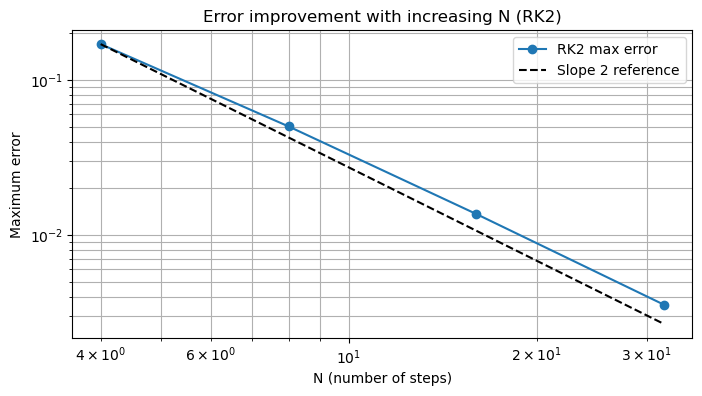

In [11]:
plt.figure(figsize=(8, 4))
plt.loglog(N_values, errors_rk2, 'o-', label='RK2 max error')
plt.xlabel('N (number of steps)')
plt.ylabel('Maximum error')
plt.title('Error improvement with increasing N (RK2)')
plt.grid(True, which='both')
plt.legend()
# Show reference line with slope 2 for comparison
N_ref = np.array(N_values)
plt.loglog(N_ref, errors_rk2[0] * (N_ref[0] / N_ref)**2, 'k--', label='Slope 2 reference')
plt.legend()
plt.show()

The expression `errors_rk2[0] * (N_ref[0] / N_ref)**2` generates a reference line with slope 2 on a log-log plot, illustrating the expected error scaling for a second-order method like RK2.

- `errors_rk2[0]` is the maximum error for the smallest N (largest step size).
- `N_ref[0] / N_ref` computes the ratio of the initial step count to each N value.
- Raising this ratio to the power of 2 models the theoretical global error decrease: for RK2, the error should scale as $O(h^2)$, and since $h \propto 1/N$, the error scales as $O(1/N^2)$.

This reference line helps visually confirm that the observed errors decrease at the expected rate for a second-order method.

## Fourth order RK
The classical fourth-order Runge-Kutta method (RK4) is one of the most widely used techniques for numerically solving ordinary differential equations. RK4 achieves high accuracy by evaluating the derivative at four carefully chosen points within each step and combining these estimates to advance the solution. The update formula for a single step from $x_k$ to $x_{k+1} = x_k + h$ is:

$$
\begin{align*}
k_1 &= f(x_k, y_k) \\
k_2 &= f\left(x_k + \frac{h}{2},\ y_k + \frac{h}{2} k_1\right) \\
k_3 &= f\left(x_k + \frac{h}{2},\ y_k + \frac{h}{2} k_2\right) \\
k_4 &= f(x_k + h,\ y_k + h k_3) \\
y_{k+1} &= y_k + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4)
\end{align*}
$$

This method provides a local error of order $O(h^5)$ and a global error of order $O(h^4)$, making it much more accurate than Euler or RK2 for the same step size. RK4 is robust, easy to implement, and suitable for a wide range of initial value problems.

In [12]:
def RK4(fcn, a, b, y0, N): # Fourth-order Runge-Kutta method
    """Solve y' = f(x, y) in N steps using
    fourth-order Runge-Kutta with initial condition y[a] = y0."""
    h = (b - a) / N # Step size
    x = a + np.arange(N + 1) * h # x values
    y = np.zeros(x.size) # y values
    y[0] = y0 # Initial condition
    for k in range(N): # Main loop'AttributeError
        k1 = fcn(x[k], y[k]) # Slope at the beginning of the interval
        k2 = fcn(x[k] + h / 2, y[k] + h * k1 / 2) # Slope at the midpoint (using k1)
        k3 = fcn(x[k] + h / 2, y[k] + h * k2 / 2) # Slope at the midpoint (using k2)
        k4 = fcn(x[k] + h, y[k] + h * k3) # Slope at the end of the interval
        y[k + 1] = y[k] + h * (k1 + 2 * (k2 + k3) + k4) / 6 # Update y value
    return x, y


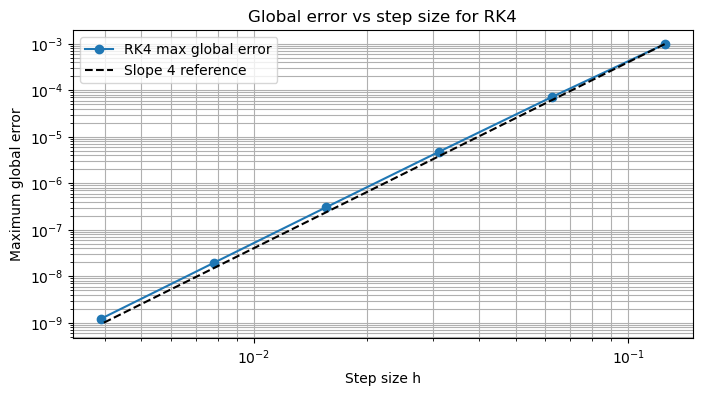

In [13]:
# Demonstrate RK4 local and global error order for the example ODE

N_values = [8, 16, 32, 64, 128, 256]
b = 1.0
errors_rk4 = []
h_values = []

for N in N_values:
    x_rk4, y_rk4 = RK4(rhs_fcn, 0, b, 1, N)
    err = np.max(np.abs(y_rk4 - exact(x_rk4)))
    errors_rk4.append(err)
    h_values.append((b - 0) / N)

plt.figure(figsize=(8, 4))
plt.loglog(h_values, errors_rk4, 'o-', label='RK4 max global error')
plt.xlabel('Step size h')
plt.ylabel('Maximum global error')
plt.title('Global error vs step size for RK4')
plt.grid(True, which='both')
plt.legend()
# Reference line with slope 4 (global error O(h^4))
plt.loglog(h_values, errors_rk4[0] * (h_values[0] / np.array(h_values))**-4, 'k--', label='Slope 4 reference')
plt.legend()
plt.show()



## Runge-Kutta-Fehlberg
The RK45 method, also known as the _Runge-Kutta-Fehlberg_ method, is an adaptive numerical technique for solving ordinary differential equations. It simultaneously computes two approximations of different orders (fourth and fifth) at each step, allowing it to estimate the local error. By comparing these estimates, RK45 can automatically adjust the step size to maintain a desired accuracy, making it efficient and reliable for problems where the solution changes rapidly or has varying stiffness. This adaptive step size control is a key advantage of RK45 over fixed-step methods.

In [14]:
def rk45(fcn, a, b, y0, N, tol=1e-6):
    """
    Runge-Kutta-Fehlberg (RK45) method for solving y' = f(x, y).
    Returns x, y, and estimated local error at each step.
    """
    h = (b - a) / N # Initial step size
    x = a + np.arange(N + 1) * h # x values
    y = np.zeros(x.size) # y values
    err = np.zeros(x.size) # Error estimates
    y[0] = y0 # Initial condition

    # Coefficients for RK45 (Fehlberg)
    for k in range(N): # Main loop
        xi, yi = x[k], y[k] # Current x and y
        k1 = h * fcn(xi, yi) # Compute k1 to k6
        k2 = h * fcn(xi + h/4, yi + k1/4) 
        k3 = h * fcn(xi + 3*h/8, yi + 3*k1/32 + 9*k2/32)
        k4 = h * fcn(xi + 12*h/13, yi + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h * fcn(xi + h, yi + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h * fcn(xi + h/2, yi - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)

        # 4th order estimate
        y4 = yi + (25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5) 
        # 5th order estimate
        y5 = yi + (16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55)
        y[k+1] = y5
        err[k+1] = np.abs(y5 - y4)
    return x, y, err

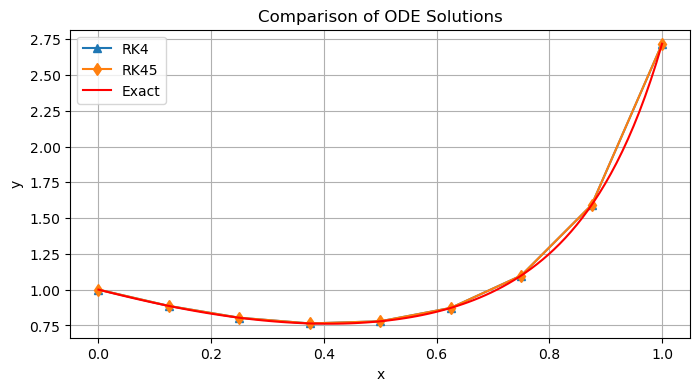

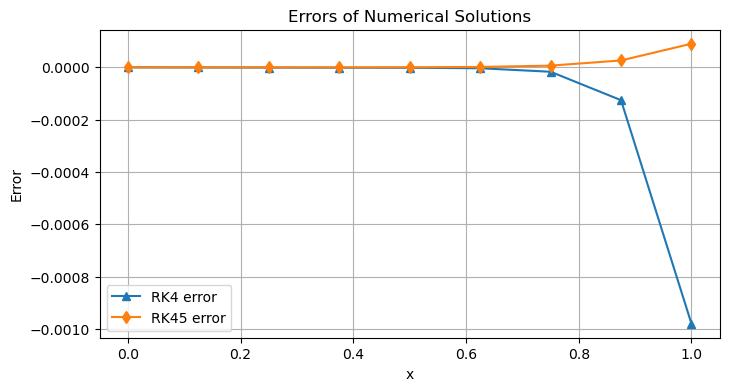

In [15]:
# Solve the example ODE y' = (6x^2 - 1) y, y(0) = 1 using RK2 and compare to Euler and exact

N = 8
b = 1.0
rk45_tol=1e-12
x_rk2, y_rk2 = rk2(rhs_fcn, 0, b, 1, N)
x_rk4, y_rk4 = RK4(rhs_fcn, 0, b, 1, N)
x, y_euler = euler(rhs_fcn, 0, b, 1, N)
exact = lambda x: np.exp(2*x**3 - x)
x_rk5, y_rk5, err_rk5 = rk45(rhs_fcn, 0, b, 1, N, tol=rk45_tol )


plt.figure(figsize=(8, 4))
x=np.linspace(0, b, 100)
#plt.plot(x, y_euler, 'o-', label='Euler')
#plt.plot(x_rk2, y_rk2, 's-', label='RK2')
plt.plot(x_rk4, y_rk4, '^-', label='RK4')
plt.plot(x_rk5, y_rk5, 'd-', label='RK45')
plt.plot(x, exact(x), 'r-', label='Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of ODE Solutions')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
#plt.plot(x, y_euler - exact(x), 'o-', label='Euler error')
#plt.plot(x_rk2, (y_rk2 - exact(x_rk2)) , 's-', label='RK2 error')
plt.plot(x_rk4, (y_rk4 - exact(x_rk4)) , '^-', label='RK4 error')
plt.plot(x_rk5, (y_rk5 - exact(x_rk5)) , 'd-', label='RK45 error')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Errors of Numerical Solutions')
plt.legend()
plt.grid(True)
plt.show()

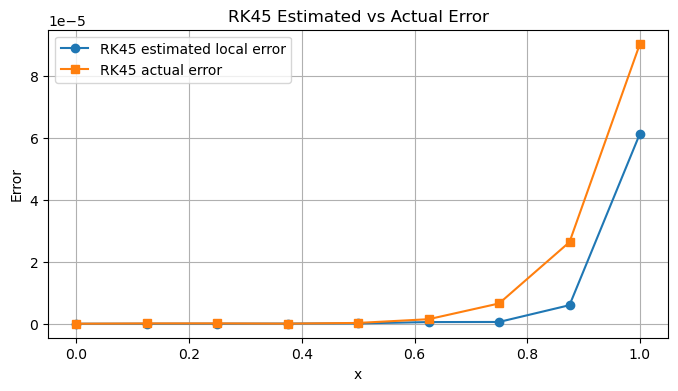

In [16]:

plt.figure(figsize=(8, 4))
plt.plot(x_rk5, err_rk5, 'o-', label='RK45 estimated local error')
plt.plot(x_rk5, np.abs(y_rk5 - exact(x_rk5)), 's-', label='RK45 actual error')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('RK45 Estimated vs Actual Error')
plt.legend()
plt.grid(True)
plt.show()


### Adaptive RK45 scheme
The adaptive RK45 scheme is a numerical method for solving ordinary differential equations (ODEs) that automatically adjusts the step size to control the local error. It uses the Runge-Kutta-Fehlberg method, which computes two estimates of the solution at each step: one of fourth order and one of fifth order. The difference between these estimates provides an error estimate.

**How it works:**
- At each step, RK45 calculates both a fourth-order and a fifth-order solution.
- The local error is estimated as the difference between these two solutions.
- If the error is below a specified tolerance, the step is accepted and the step size may be increased.
- If the error is above the tolerance, the step is rejected and the step size is reduced.
- This process continues, allowing the method to take larger steps in smooth regions and smaller steps where the solution changes rapidly.

**Advantages:**
- Efficient: Automatically chooses step sizes, reducing unnecessary computations.
- Accurate: Maintains a user-defined error tolerance throughout the integration.
- Robust: Handles stiff or rapidly changing solutions better than fixed-step methods.

Adaptive RK45 is widely used in scientific computing for reliable and efficient ODE integration.

In [17]:
def adaptive_rk45(fcn, a, b, y0, tol=1e-6, h_init=0.1, h_min=1e-8, h_max=0.5):
    """
    Adaptive RK45 solver for y' = f(x, y) with error tolerance.
    Returns arrays of x and y.
    """
    x_vals = [a] # Initialize lists to store x and y values
    y_vals = [y0] # Initialize lists to store x and y values
    h = h_init # Initial step size
    x = a # Start at initial x
    y = y0 # Start at initial y

    while x < b: # Continue until reaching b
        if x + h > b: # Adjust step size if overshooting
            h = b - x 

        # Fehlberg coefficients
        k1 = h * fcn(x, y)
        k2 = h * fcn(x + h/4, y + k1/4)
        k3 = h * fcn(x + 3*h/8, y + 3*k1/32 + 9*k2/32)
        k4 = h * fcn(x + 12*h/13, y + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
        k5 = h * fcn(x + h, y + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
        k6 = h * fcn(x + h/2, y - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)

        y4 = y + (25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5)
        y5 = y + (16*k1/135 + 6656*k3/12825 + 28561*k4/56430 - 9*k5/50 + 2*k6/55)
        err = np.abs(y5 - y4)

        if err < tol or h <= h_min: # Accept step if error is within tolerance
            x += h
            y = y5
            x_vals.append(x)
            y_vals.append(y)
            # Increase step if error is much smaller than tolerance
            if err < tol/10 and h < h_max:
                h = min(h * 2, h_max)
        else: # Reject step if error is too large
            # Reduce step size
            h = max(h * 0.5, h_min)

    return np.array(x_vals), np.array(y_vals)

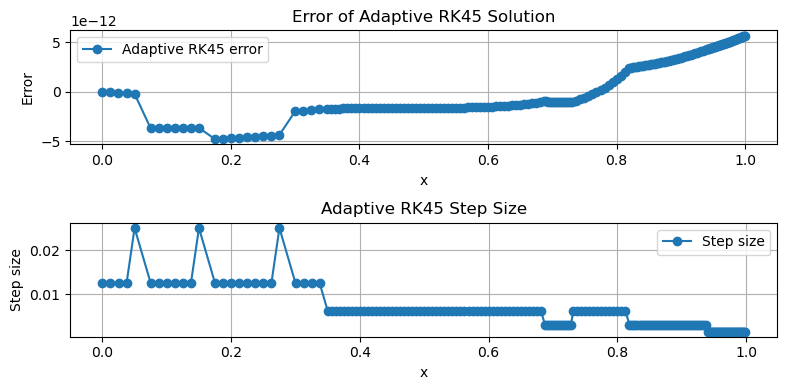

In [18]:
# Solve the example ODE y' = (6x^2 - 1) y, y(0) = 1 using adaptive RK45
x_adapt, y_adapt = adaptive_rk45(rhs_fcn, 0, 1.0, 1, tol=1e-12)
x = np.linspace(0, 1.0, 100)
fig,ax=plt.subplots(2, 1, figsize=(8, 4))
ax[0].plot(x_adapt, y_adapt - exact(x_adapt), 'o-', label='Adaptive RK45 error')
ax[0].set_xlabel('x')
ax[0].set_ylabel('Error')
ax[0].set_title('Error of Adaptive RK45 Solution')
ax[0].legend()
ax[0].grid(True)

ax[1].set_xlabel('x')
step_sizes = np.diff(x_adapt)
ax[1].plot(x_adapt[:-1], step_sizes, 'o-', label='Step size')
ax[1].set_xlabel('x')
ax[1].set_ylabel('Step size')
plt.title('Adaptive RK45 Step Size')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()




## Explicit and Implicit Euler Example: Exponential Decay

Consider the standard ODE for exponential decay:
$$
\frac{dy}{dt} = -k y, \quad y(0) = y_0
$$
with analytical solution:
$$
y(t) = y_0 e^{-k t}
$$

Let's compare the explicit and implicit Euler methods for $k=2$, $y_0=1$, over $t \in [0, 2]$.

**Explicit Euler:**
$$
y_{n+1} = y_n + h (-k y_n) = y_n (1 - k h)
$$

**Implicit Euler:**
$$
y_{n+1} = y_n + h (-k y_{n+1}) \implies y_{n+1} = \frac{y_n}{1 + k h}
$$

Below is the code to demonstrate both methods and compare to the exact solution:



In [27]:
import ipywidgets as widgets
from IPython.display import display

k = 2
y0 = 1
a, b = 0, 2
N = 10
h = (b - a) / N
t = a + np.arange(N + 1) * h

def plot_euler_explicit_implicit(N=10, k=2):
    h = (b - a) / N
    t = a + np.arange(N + 1) * h

    # Explicit Euler
    y_exp = np.zeros(N + 1)
    y_exp[0] = y0
    for n in range(N):
        y_exp[n+1] = y_exp[n] * (1 - k * h)

    # Implicit Euler
    y_imp = np.zeros(N + 1)
    y_imp[0] = y0
    for n in range(N):
        y_imp[n+1] = y_imp[n] / (1 + k * h)

    # Exact solution
    y_exact = y0 * np.exp(-k * t)

    plt.figure(figsize=(8, 4))
    plt.plot(t, y_exact, 'r-', label='Exact')
    plt.plot(t, y_exp, 'o-', label='Explicit Euler')
    plt.plot(t, y_imp, 's-', label='Implicit Euler')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(f"Explicit vs Implicit Euler for $y' = -ky$, h={h:.3f}")
    plt.legend()
    plt.grid(True)
    plt.show()

slider_N = widgets.IntSlider(value=10, min=2, max=100, step=1, description='N')
slider_k = widgets.FloatSlider(value=2, min=0.1, max=5, step=0.1, description='k')
widgets.interact(plot_euler_explicit_implicit, N=slider_N, k=slider_k)
plt.show()



interactive(children=(IntSlider(value=10, description='N', min=2), FloatSlider(value=2.0, description='k', max…

**Observation:**
- The explicit Euler method can become unstable for large $h$ (step size), especially for stiff problems (large $k$).
- The implicit Euler method is unconditionally stable and handles stiff problems much better.

# Adams methods
Adams methods are a family of multistep techniques for numerically solving ordinary differential equations (ODEs). Unlike single-step methods such as Euler or Runge-Kutta, Adams methods use information from several previous points to estimate the solution at the next step. This approach can improve efficiency and accuracy, especially for problems where the solution is smooth.

There are two main types of Adams methods:

- **Adams-Bashforth methods** (explicit): These use previous function evaluations to predict the next value. They are easy to implement but may require small step sizes for stability.
- **Adams-Moulton methods** (implicit): These incorporate the current and previous points, often requiring the solution of an equation at each step. They are generally more stable and accurate, making them suitable for stiff problems.

Adams methods are widely used in scientific computing, particularly for long-time integration of ODEs, due to their efficiency and ability to leverage past information.

## Adams-Bashforth Method Derivation

The Adams-Bashforth methods are explicit multistep schemes derived by integrating the ODE over an interval and approximating the integrand using polynomial interpolation of previous function values.

Consider the ODE:
$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$

To advance from $x_n$ to $x_{n+1} = x_n + h$, integrate both sides:
$$
y_{n+1} = y_n + \int_{x_n}^{x_{n+1}} f(x, y(x))\,dx
$$

Since $f(x, y(x))$ is generally unknown, approximate it using previous values. For the **two-step Adams-Bashforth method** (order 2), use a linear interpolation based on $f_n = f(x_n, y_n)$ and $f_{n-1} = f(x_{n-1}, y_{n-1})$:

- Interpolate $f(x, y(x))$ over $[x_{n-1}, x_n]$ using these two points.
- Integrate the interpolating polynomial over $[x_n, x_{n+1}]$.

This yields:
$$
y_{n+1} = y_n + h \left[ \frac{3}{2} f_n - \frac{1}{2} f_{n-1} \right]
$$

**General Adams-Bashforth formula (k-step):**
$$
y_{n+1} = y_n + h \sum_{j=0}^{k-1} b_j f_{n-j}
$$
where the coefficients $b_j$ are determined by integrating the Lagrange interpolating polynomial through the previous $k$ points.

**Example coefficients:**
- 1-step (Euler): $[1]$
- 2-step: $[\frac{3}{2}, -\frac{1}{2}]$
- 3-step: $[\frac{23}{12}, -\frac{16}{12}, \frac{5}{12}]$

The Adams-Bashforth method thus uses previous function evaluations to predict the next value, improving accuracy and efficiency for smooth problems.

## Adams-Moulton Method Derivation

The Adams-Moulton methods are implicit multistep schemes for numerically solving ordinary differential equations (ODEs). They are derived by integrating the ODE over an interval and approximating the integrand using polynomial interpolation, including the unknown value at the next step.

Consider the ODE:
$$
\frac{dy}{dx} = f(x, y), \quad y(x_0) = y_0
$$

To advance from $x_n$ to $x_{n+1} = x_n + h$, integrate both sides:
$$
y_{n+1} = y_n + \int_{x_n}^{x_{n+1}} f(x, y(x))\,dx
$$

Since $f(x, y(x))$ is generally unknown, approximate it using previous and current values. For the **two-step Adams-Moulton method** (order 2), use a linear interpolation based on $f_{n+1} = f(x_{n+1}, y_{n+1})$ and $f_n = f(x_n, y_n)$:

- Interpolate $f(x, y(x))$ over $[x_n, x_{n+1}]$ using these two points.
- Integrate the interpolating polynomial over $[x_n, x_{n+1}]$.

This yields:
$$
y_{n+1} = y_n + \frac{h}{2} \left[ f_{n+1} + f_n \right]
$$

**General Adams-Moulton formula (k-step):**
$$
y_{n+1} = y_n + h \sum_{j=0}^{k-1} a_j f_{n+1-j}
$$
where the coefficients $a_j$ are determined by integrating the Lagrange interpolating polynomial through the current and previous $k-1$ points.

**Example coefficients:**
- 1-step (implicit Euler): $[1]$
- 2-step (trapezoidal): $[\frac{1}{2}, \frac{1}{2}]$
- 3-step: $[\frac{5}{12}, \frac{2}{3}, -\frac{1}{12}]$

The Adams-Moulton method uses both current and previous function evaluations, making it implicit and generally more stable and accurate than explicit methods like Adams-Bashforth, especially for stiff problems. Solving for $y_{n+1}$ typically requires a nonlinear solver or predictor-corrector approach.

## Predictor-Corrector Schemes

Predictor-corrector schemes are a class of numerical methods for solving ordinary differential equations (ODEs) that combine an explicit "predictor" step with an implicit "corrector" step. The predictor estimates the solution at the next point, and the corrector refines this estimate using additional information, often leading to improved accuracy and stability.

**Workflow:**
1. **Predictor:** Use an explicit method (e.g., Adams-Bashforth) to estimate $y_{n+1}^{(p)}$.
2. **Corrector:** Use an implicit method (e.g., Adams-Moulton) to refine the estimate:
    $$
    y_{n+1} = y_n + h \sum_{j=0}^{k-1} a_j f_{n+1-j}
    $$
    where $f_{n+1}$ is evaluated at the predicted value $y_{n+1}^{(p)}$.

**Example:**
- **Adams-Bashforth-Moulton (ABM) 2-step:**
     - Predictor (Adams-Bashforth):
        $$
        y_{n+1}^{(p)} = y_n + h \left[ \frac{3}{2} f_n - \frac{1}{2} f_{n-1} \right]
        $$
     - Corrector (Adams-Moulton):
        $$
        y_{n+1} = y_n + \frac{h}{2} \left[ f_{n+1}^{(p)} + f_n \right]
        $$
        where $f_{n+1}^{(p)} = f(x_{n+1}, y_{n+1}^{(p)})$.

**Advantages:**
- Improved accuracy over single-step methods.
- Better stability, especially for stiff problems.
- Efficient for long-time integration.

Predictor-corrector schemes are widely used in practice, especially in multistep ODE solvers, and form the basis for many modern integration routines.

Adams-Bashforth 2-step time: 0.000095 s
Adams-Moulton 2-step time: 0.000196 s
Predictor-Corrector time: 0.000069 s


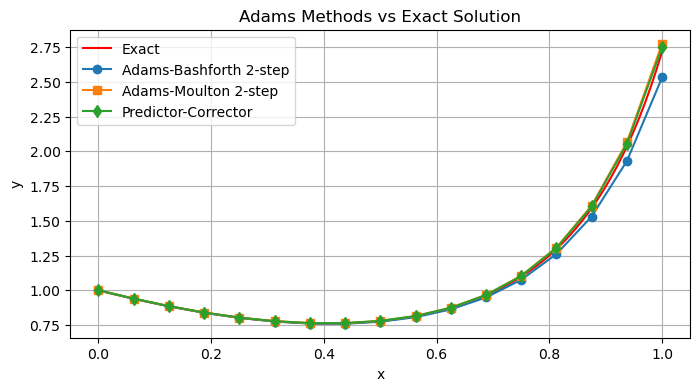

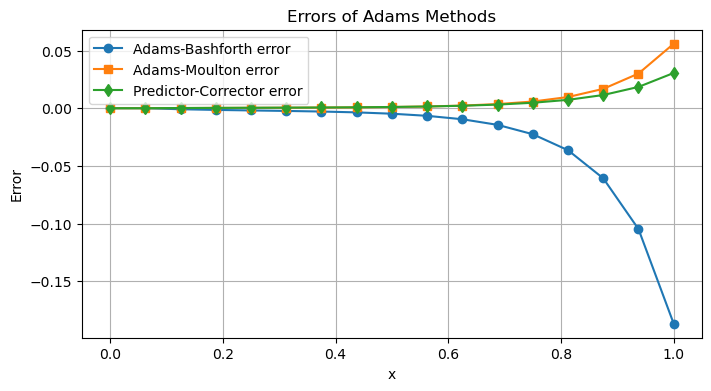

In [24]:
import time

# Adams-Bashforth 2-step, Adams-Moulton 2-step, and Predictor-Corrector for y' = (6x^2 - 1)y, y(0)=1

def adams_bashforth_2(fcn, a, b, y0, N):
    h = (b - a) / N
    x = a + np.arange(N + 1) * h
    y = np.zeros(x.size)
    y[0] = y0
    # Use RK4 for the first step to start the method
    _, y_rk4 = RK4(fcn, a, a + h, y0, 1)
    y[1] = y_rk4[1]
    f_prev = fcn(x[0], y[0])
    for k in range(1, N):
        f_n = fcn(x[k], y[k])
        f_nm1 = f_prev
        f_prev = f_n
        y[k+1] = y[k] + h * (1.5 * f_n - 0.5 * f_nm1)
    return x, y

def adams_moulton_2(fcn, a, b, y0, N, max_iter=10, tol=1e-12):
    h = (b - a) / N
    x = a + np.arange(N + 1) * h
    y = np.zeros(x.size)
    y[0] = y0
    # Use RK4 for the first step
    _, y_rk4 = RK4(fcn, a, a + h, y0, 1)
    y[1] = y_rk4[1]
    for k in range(1, N):
        f_n = fcn(x[k], y[k])
        # Implicit Adams-Moulton: solve for y_{k+1} using fixed-point iteration
        y_pred = y[k] + h * f_n  # initial guess (Euler)
        y_next = y_pred
        for _ in range(max_iter):
            f_np1 = fcn(x[k+1], y_next)
            y_new = y[k] + h * 0.5 * (f_np1 + f_n)
            if np.abs(y_new - y_next) < tol:
                break
            y_next = y_new
        y[k+1] = y_next
    return x, y

def predictor_corrector(fcn, a, b, y0, N):
    h = (b - a) / N
    x = a + np.arange(N + 1) * h
    y = np.zeros(x.size)
    y[0] = y0
    # Use RK4 for the first step
    _, y_rk4 = RK4(fcn, a, a + h, y0, 1)
    y[1] = y_rk4[1]
    for k in range(1, N):
        f_n = fcn(x[k], y[k])
        f_nm1 = fcn(x[k-1], y[k-1])
        # Predictor: Adams-Bashforth 2-step
        y_pred = y[k] + h * (1.5 * f_n - 0.5 * f_nm1)
        f_np1_pred = fcn(x[k+1], y_pred)
        # Corrector: Adams-Moulton 2-step
        y[k+1] = y[k] + h * 0.5 * (f_np1_pred + f_n)
    return x, y

N = 16
b = 1.0


start_ab = time.time()
x_ab, y_ab = adams_bashforth_2(rhs_fcn, 0, b, 1, N)
end_ab = time.time()

start_am = time.time()
x_am, y_am = adams_moulton_2(rhs_fcn, 0, b, 1, N)
end_am = time.time()

start_pc = time.time()
x_pc, y_pc = predictor_corrector(rhs_fcn, 0, b, 1, N)
end_pc = time.time()

print(f"Adams-Bashforth 2-step time: {end_ab - start_ab:.6f} s")
print(f"Adams-Moulton 2-step time: {end_am - start_am:.6f} s")
print(f"Predictor-Corrector time: {end_pc - start_pc:.6f} s")
x_dense = np.linspace(0, b, 100)

plt.figure(figsize=(8, 4))
plt.plot(x_dense, exact(x_dense), 'r-', label='Exact')
plt.plot(x_ab, y_ab, 'o-', label='Adams-Bashforth 2-step')
plt.plot(x_am, y_am, 's-', label='Adams-Moulton 2-step')
plt.plot(x_pc, y_pc, 'd-', label='Predictor-Corrector')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Adams Methods vs Exact Solution')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(x_ab, y_ab - exact(x_ab), 'o-', label='Adams-Bashforth error')
plt.plot(x_am, y_am - exact(x_am), 's-', label='Adams-Moulton error')
plt.plot(x_pc, y_pc - exact(x_pc), 'd-', label='Predictor-Corrector error')
plt.xlabel('x')
plt.ylabel('Error')
plt.title('Errors of Adams Methods')
plt.legend()
plt.grid(True)
plt.show()

### RK Methods in SciPy and NumPy

**SciPy** provides robust routines for solving ordinary differential equations (ODEs) using Runge-Kutta methods:

- `scipy.integrate.solve_ivp`: This is the main interface for ODE integration. It supports several methods:
    - `'RK45'`: Explicit Runge-Kutta method of order 5(4). It is adaptive and widely used.
    - `'RK23'`: Explicit Runge-Kutta method of order 3(2), suitable for less stringent accuracy requirements.
    - `'Radau'`, `'BDF'`, `'LSODA'`: Implicit and multi-step methods for stiff problems.

Example usage:
To solve an ODE using SciPy's `solve_ivp`, you define the right-hand side function and call `solve_ivp` with the desired method. For example, to solve $y' = (6x^2 - 1)y$ with $y(0) = 1$:

```python
from scipy.integrate import solve_ivp
def rhs(x, y):
    return (6 * x**2 - 1) * y

sol = solve_ivp(rhs, [0, 1], [1], method='RK45', t_eval=np.linspace(0, 1, 100))
plt.plot(sol.t, sol.y[0], label='RK45 (SciPy)')
plt.plot(sol.t, np.exp(2 * sol.t**3 - sol.t), 'r--', label='Exact')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
```

This integrates the ODE from $x=0$ to $x=1$ and compares the numerical solution to the exact solution.

## Demonstration of Stiff Problems

A **stiff problem** in ODEs is one where certain numerical methods (like explicit Euler) require extremely small step sizes for stability, even though the solution itself may vary slowly. Stiffness typically arises when the ODE contains rapidly decaying components alongside slowly varying ones.

**Example:**
Consider the ODE
$$
\frac{dy}{dt} = -1000y + 3000 - 2000e^{-t}, \quad y(0) = 0
$$
The analytical solution is
$$
y(t) = 3 - 0.998\, e^{-1000t} - 2.002\, e^{-t}
$$
This equation is stiff because of the term $-1000y$, which causes rapid decay.

**Explicit Euler (unstable for large $h$):**
$$
y_{n+1} = y_n + h\, f(t_n, y_n)
$$

**Implicit Euler (stable for large $h$):**
$$
y_{n+1} = y_n + h\, f(t_{n+1}, y_{n+1})
$$

**Observation:**  
- Explicit Euler becomes unstable unless $h$ is extremely small.
- Implicit Euler remains stable even for large $h$.

Stiff problems are best handled by implicit methods or specialized stiff solvers (e.g., `scipy.integrate.solve_ivp` with method `'Radau'` or `'BDF'`).

Radau is an implicit Runge-Kutta method well-suited for stiff differential equations, while BDF (Backward Differentiation Formula) is an implicit multistep method that efficiently handles stiff problems using previous time steps.



Radau time: 0.003901 s
RK23 time: 0.001497 s
RK45 time: 0.000882 s


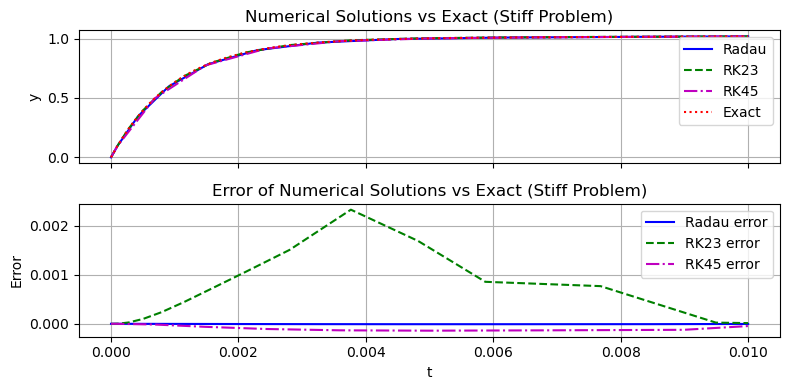

In [5]:
from scipy.integrate import solve_ivp
import numpy as np
import time

import matplotlib.pyplot as plt

# Define the RHS with parameters as arguments
def stiff_rhs(t, y, k1, k2, k3): # Stiff ODE RHS, notice t is first argument, and parameters follow.
    return -k1 * y + k2 - k3 * np.exp(-t)

# Parameters
k1 = 1000
k2 = 3000
k3 = 2000

# Initial condition and time span
y0 = [0]
t_span = (0, 0.01)
t_eval = np.linspace(t_span[0], t_span[1], 100)

start_radau = time.time()
sol = solve_ivp(stiff_rhs, t_span, y0, args=(k1, k2, k3), method='Radau', t_eval=t_eval)
end_radau = time.time()

start_rk23 = time.time()
solRK23 = solve_ivp(stiff_rhs, t_span, y0, args=(k1, k2, k3), method='RK23', t_eval=t_eval)
end_rk23 = time.time()

start_rk45 = time.time()
solRK45 = solve_ivp(stiff_rhs, t_span, y0, args=(k1, k2, k3), method='RK45', t_eval=t_eval)
end_rk45 = time.time()

print(f"Radau time: {end_radau - start_radau:.6f} s")
print(f"RK23 time: {end_rk23 - start_rk23:.6f} s")
print(f"RK45 time: {end_rk45 - start_rk45:.6f} s")
sol = solve_ivp(stiff_rhs, t_span, y0, args=(k1, k2, k3), method='Radau')#, t_eval=t_eval) # Radau is suitable for stiff problems
solRK23 = solve_ivp(stiff_rhs, t_span, y0, args=(k1, k2, k3), method='RK23')#, t_eval=t_eval) # RK23 is not suitable for stiff problems
solRK45 = solve_ivp(stiff_rhs, t_span, y0, args=(k1, k2, k3), method='RK45')#, t_eval=t_eval) # RK45 is not suitable for stiff problems 

# Analytical solution for comparison
def exact_sol(t):
    return 3 - 0.998 * np.exp(-1000 * t) - 2.002 * np.exp(-t)


fig, axs = plt.subplots(2, 1, figsize=(8, 4), sharex=True)

# Top plot: solution
axs[0].plot(sol.t, sol.y[0], 'b-', label='Radau')
axs[0].plot(solRK23.t, solRK23.y[0], 'g--', label='RK23')
axs[0].plot(solRK45.t, solRK45.y[0], 'm-.', label='RK45')
axs[0].plot(t_eval, exact_sol(t_eval), 'r:', label='Exact')
axs[0].set_ylabel('y')
axs[0].set_title('Numerical Solutions vs Exact (Stiff Problem)')
axs[0].legend()
axs[0].grid(True)

# Bottom plot: error
axs[1].plot(sol.t, sol.y[0] - exact_sol(sol.t), 'b-', label='Radau error')
axs[1].plot(solRK23.t, solRK23.y[0] - exact_sol(solRK23.t), 'g--', label='RK23 error')
axs[1].plot(solRK45.t, solRK45.y[0] - exact_sol(solRK45.t), 'm-.', label='RK45 error')
axs[1].set_xlabel('t')
axs[1].set_ylabel('Error')
axs[1].set_title('Error of Numerical Solutions vs Exact (Stiff Problem)')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()



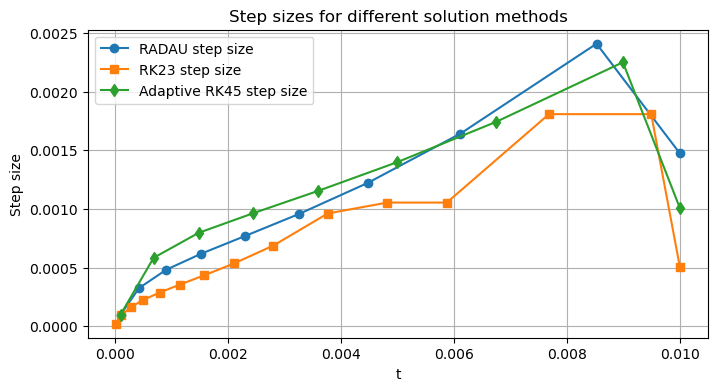

In [2]:
plt.figure(figsize=(8, 4))

# RADAU
plt.plot(sol.t[1:], np.diff(sol.t), 'o-', label='RADAU step size')

# RK23
plt.plot(solRK23.t[1:], np.diff(solRK23.t), 's-', label='RK23 step size')

# Adaptive RK45
plt.plot(solRK45.t[1:], np.diff(solRK45.t), 'd-', label='Adaptive RK45 step size')

plt.xlabel('t')
plt.ylabel('Step size')
plt.title('Step sizes for different solution methods')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
out_sol = solRK45
print("Message:", out_sol.message)
print("Success:", out_sol.success)
print("Status:", out_sol.status)
print("t (time points):", out_sol.t)
print("y (solution values):", out_sol.y)
print("Number of function evaluations (nfev):", out_sol.nfev)
print("Number of Jacobian evaluations (njev):", out_sol.njev)
print("Number of LU decompositions (nlu):", out_sol.nlu)

Message: The solver successfully reached the end of the integration interval.
Success: True
Status: 0
t (time points): [0.00000000e+00 1.00000000e-04 6.83500682e-04 1.48009898e-03
 2.44356406e-03 3.59843707e-03 4.99821218e-03 6.73999826e-03
 8.99143763e-03 1.00000000e-02]
y (solution values): [[0.         0.09517226 0.49551627 0.77373905 0.91610265 0.97774618
  1.00110457 1.01013396 1.01567321 1.01782878]]
Number of function evaluations (nfev): 56
Number of Jacobian evaluations (njev): 0
Number of LU decompositions (nlu): 0


**Tasks** 
1. Try our adaptive RK45 routine on the problem above. 

2. Try do this Jupyter file on new problems, such as these:
$$ \begin{align*}
a.\quad & \frac{d}{dt} y(t) - y(t) = e^t,\quad y(0) = 1 \\
b.\quad & \frac{d}{dx} y(x) = \sin(x)\, y(x),\quad y(0) = 2 \\
c.\quad & \frac{d}{dt} y(t) = -ky(t),\quad y(0) = 1 \\
d.\quad & \frac{d}{dx} y(x) = x^2 y(x) + \cos(x),\quad y(0) = 0 \\
\end{align*}
$$
